### Metrics Agg: Compare & Analyze `EvalMetrics`


In [4]:
import os
import pandas as pd
from matplotlib import pyplot as plt

### Load & Setup

In [5]:
!ls assets/metrics-dfs

metrics1-df-net3.csv   metrics2-df-rf.csv      metrics4-rflasso.csv
metrics2-df-lasso.csv  metrics3-df-resnet.csv  rcn6b-featsnet1x.csv


In [19]:
d = 'assets/metrics-dfs/'
fns = [fn for fn in os.listdir(d) if 'csv' in fn]
dfs = [pd.read_csv(d + fn) for fn in fns]
df  = pd.concat(dfs, join='inner')

cols = ['model', 'details', 'target', 'split', 'mse', 'mae', 'r2', 'dist_avg', 'dist_r2', 'sqdist_avg', 'sqdist_r2']
assert all([col in df.columns for col in cols])

In [20]:
# d = 'assets/metrics-dfs/'
# net3 =   pd.read_csv(d + 'metrics1-df-net3.csv')
# lasso =  pd.read_csv(d + 'metrics2-df-lasso.csv')
# rf =     pd.read_csv(d + 'metrics2-df-rf.csv')
# resnet = pd.read_csv(d + 'metrics3-df-resnet.csv')
# df = pd.concat((net3, lasso, rf, resnet), join='inner')

In [21]:
df.head(2)

,model,details,target,split,mse,mae,r2,dist_avg,dist_r2,sqdist_avg,sqdist_r2
0,Net3,10 fit epochs,center,valid,0.002321,0.035860,0.529265,0.057386,0.430105,0.004642,0.625702
1,Net3,10 fit epochs,center,train,0.001251,0.026886,0.780596,0.042757,0.590545,0.002502,0.810111


### Relevant Splits

In [22]:
tmp = df[(df['split'] == 'valid') & (df['target'] == 'topleft')]
tmp = tmp.sort_values(by='dist_r2', ascending=False)
tmp[['model', 'mse', 'r2', 'dist_avg', 'dist_r2']].round(3)

,model,mse,r2,dist_avg,dist_r2
2,RF Feats,0.000,1.000,0.001,0.995
2,RF,0.010,0.835,0.085,0.707
2,Lasso,0.018,0.692,0.130,0.550
6,Lasso Feats,0.018,0.692,0.130,0.550
4,FeatsNet1.22,0.013,0.567,0.127,0.413
2,FeatsNet1.12,0.016,0.498,0.140,0.352
0,FeatsNet1.11,0.018,0.343,0.152,0.296
0,ResNet18,0.021,0.442,0.160,0.260
10,FeatsNet1.22,0.018,0.356,0.162,0.252
2,Net3,0.021,0.170,0.167,0.228


In [23]:
tmp = df[(df['split'] == 'valid') & (df['target'] == 'center')]
tmp = tmp.sort_values(by='dist_r2', ascending=False)
tmp[['model', 'mse', 'r2', 'dist_avg', 'dist_r2']].round(3)

,model,mse,r2,dist_avg,dist_r2
3,RF Feats,0.000,0.977,0.014,0.900
3,RF,0.002,0.871,0.042,0.708
3,Lasso,0.002,0.842,0.053,0.629
7,Lasso Feats,0.002,0.842,0.053,0.629
2,ResNet18,0.003,0.426,0.050,0.504
0,Net3,0.002,0.529,0.057,0.430
16,FeatsNet1.22,0.014,0.544,0.130,0.400
14,FeatsNet1.12,0.016,0.535,0.141,0.348
12,FeatsNet1.11,0.018,0.372,0.147,0.321
22,FeatsNet1.22,0.017,0.352,0.158,0.269


### The Whole Thing

In [24]:
df

,model,details,target,split,mse,mae,r2,dist_avg,dist_r2,sqdist_avg,sqdist_r2
0,Net3,10 fit epochs,center,valid,0.002321,0.035860,0.529265,0.057386,0.430105,0.004642,0.625702
1,Net3,10 fit epochs,center,train,0.001251,0.026886,0.780596,0.042757,0.590545,0.002502,0.810111
2,Net3,10 fit epochs,topleft,valid,0.020588,0.103328,0.170152,0.166890,0.227500,0.041177,0.355698
3,Net3,10 fit epochs,topleft,train,0.014115,0.086962,0.388219,0.138814,0.409787,0.028231,0.628363
0,Lasso,alpha=1,topleft,train,0.005253,0.046936,0.909307,0.074546,0.750168,0.010506,0.910770
1,Lasso,alpha=1,center,train,0.001006,0.023437,0.920351,0.037478,0.740100,0.002012,0.920277
2,Lasso,alpha=1,topleft,valid,0.017655,0.081952,0.692450,0.130459,0.549808,0.035310,0.691744
3,Lasso,alpha=1,center,valid,0.001982,0.033595,0.842115,0.053305,0.629211,0.003964,0.842354
0,RF,default params,topleft,train,0.001585,0.018339,0.972602,0.030422,0.898043,0.003169,0.973085
1,RF,default params,center,train,0.000213,0.009108,0.983154,0.015020,0.895842,0.000425,0.983143


### Analyze Correlation b/w Metrics

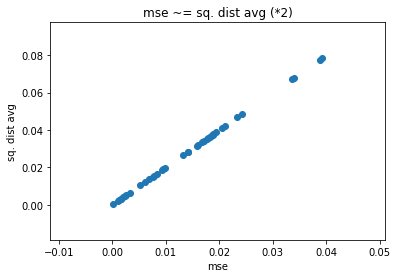

In [17]:
plt.scatter(df['mse'], df['sqdist_avg'])
plt.xlabel('mse'); plt.ylabel('sq. dist avg');
plt.title('mse ~= sq. dist avg (*2)')
xlim, ylim = plt.xlim(), plt.ylim()

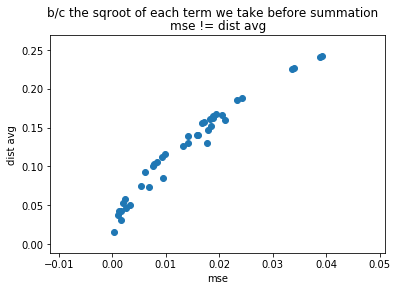

In [18]:
plt.scatter(df['mse'], df['dist_avg'])
xlim, ylim = plt.xlim(), plt.ylim()
plt.xlabel('mse'); plt.ylabel('dist avg');
plt.title('mse != dist avg')
plt.suptitle('b/c the sqroot of each term we take before summation');

#### Compare R2 to MSE
Clearly somthing is wrong, it should be proportional

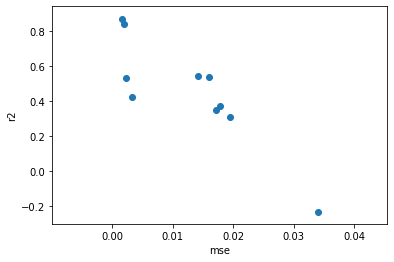

In [19]:
plt.scatter(tmp['mse'], tmp['r2'])
plt.xlabel('mse'); plt.ylabel('r2');

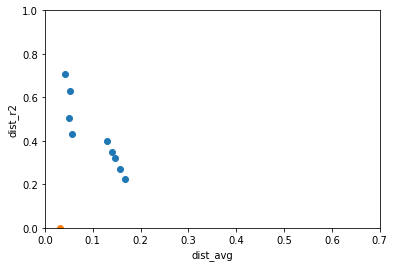

In [23]:
plt.scatter(tmp['dist_avg'], tmp['dist_r2'])
plt.scatter([0.032], [0])
plt.xlabel('dist_avg'); plt.ylabel('dist_r2');
plt.ylim(0,1)
plt.xlim(0, 0.7);

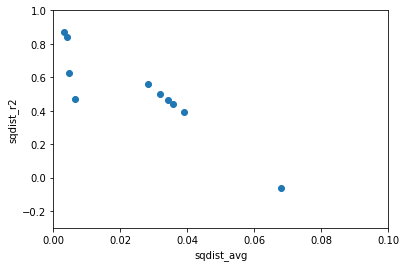

In [22]:
plt.scatter(tmp['sqdist_avg'], tmp['sqdist_r2'])
plt.xlabel('sqdist_avg'); plt.ylabel('sqdist_r2');
plt.ylim(-.3,1)
plt.xlim(0, 0.1);